Tarefa 1: 
---------
* Implementar um classificador linear (apenas o passo de predição). 
* Usar os pesos carregados para efetuar a classificação do conjunto de teste. 
* Gerar pesos aleatórios (para W e b) e comparar os resultados.
* Recomendável I: implementar ambos esquemas de predição: 1) X = (A, N); e 2) X = (N, A). Onde A é o número de atributos (pixels) e N é o número de instâncias (imagens). 
* Recomendável II: implemente o k-NN com distâncias L1 (manhattan) e L2 (euclidiana) e compare os resultados. 

In [1]:
%matplotlib inline
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split


Carregando o dataset de dígitos. Pode ser que demore um pouco, pois a rotina load_digits baixa os dados quando necessário. São 1797 imagens preto e branco com 8 x 8 pixels. 
Obs: na terceira linha é feita uma normalização para as imagens ficarem entre 0 e 1. Não se preocupe com isso ainda. 

In [2]:
# 1797 imagens em grayscale 8 x 8 = 64 pixels
# Digitos (Classes): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dataset = load_digits(n_class=10)
# Obtem as instancias (N X A)
X = dataset.data
# Obtem as classes (C)
y = dataset.target

# Divide entre treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalizacao
max_ = X_treino.max()
X_treino /= max_
X_teste  /= max_

# Imprime as dimensoes das matrizes/vetores
print 'X_treino:', X_treino.shape
print 'y_treino:', y_treino.shape
print 'X_teste :', X_teste.shape
print 'y_teste :', y_teste.shape

X_treino: (1203, 64)
y_treino: (1203,)
X_teste : (594, 64)
y_teste : (594,)


Em seguida nós plotamos algumas imagens do treino para verificar se os dados foram carregados corretamente. Não se preocupe se não entender esta parte do código. 

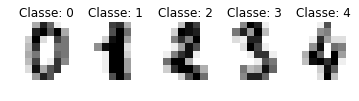

In [3]:
import pylab as plt
plt.gray() 
images_and_labels = list(zip(dataset.images, dataset.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Classe: %i' % label)

Aqui estão os pesos que você deverá usar para fazer a classificação do treino. 

In [4]:
# Carrega os pesos serializados
W, b = np.load('weights.npy')
# Imprime as dimensões das matrizes/vetores dos pesos
print 'W shape', W.shape
print 'b shape', b.shape

W shape (64, 10)
b shape (1, 10)


1) Implemente a predição usando o classificador linear:

In [5]:
def predicao(X, W, b):
    predict_matrix = np.dot(X,W)+b
    
    y_predito = np.zeros(predict_matrix.shape[0])
    
    prediction_size = predict_matrix.shape[0]
    for i in xrange(prediction_size):
        y_predito[i] = np.argmax(predict_matrix[i])

    return y_predito


2) Implemente uma medida de desempenho como acurácia ou erro de classificação (evite usar sklearn e outras bibliotecas prontas para isso). 
* Acurácia = Número de acertos / Número de imagens 
* Erro = Número de erros / Número de imagens
* Implemente outras medidas se quiser. 


In [6]:
def avaliar_resultados(y_teste, y_predito):
    num_of_images = y_teste.size
    #print y_teste - y_predito
    num_of_errors = float(np.count_nonzero(y_teste - y_predito))
    num_of_hits = num_of_images - num_of_errors
    desempenho = num_of_hits / num_of_images #Acurácia
    
    print 'Number of images: %d \nNumber of errors: %d \nNumber of Hits: %d \nAccuracy: %f\n' \
    % (num_of_images, num_of_errors, num_of_hits, desempenho)
    
    return desempenho

def getAccuracy(y_teste, y_predito):
    num_of_images = y_teste.size
    num_of_errors = float(np.count_nonzero(y_teste - y_predito))
    num_of_hits = num_of_images - num_of_errors
    accuracy = num_of_hits / num_of_images #Acurácia

    return accuracy

3) Teste o desempenho do classificador usando pesos alatórios para a mesma tarefa de classificação e compare os resultados.

In [7]:
def inicializacao_aleatoria():
    W = np.random.rand(64,10) 
    b = np.random.rand(1, 10) 
    return W, b

In [8]:
y_predito = predicao(X_teste, W, b)

avaliar_resultados(y_teste, y_predito)

Number of images: 594 
Number of errors: 23 
Number of Hits: 571 
Accuracy: 0.961279



0.9612794612794613

In [9]:
W_rand, b_rand = inicializacao_aleatoria()
y_rand_predito = predicao(X_teste, W_rand, b_rand)
avaliar_resultados(y_teste, y_rand_predito)

Number of images: 594 
Number of errors: 559 
Number of Hits: 35 
Accuracy: 0.058923



0.058922558922558925

In [10]:
class Knn:
    def __init__(self):
        pass
    
    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        
    def predict(self, X):
        nb_test_instances = X.shape[0]
        print nb_test_instances
        
        y_pred_l1 = np.zeros(nb_test_instances, dtype = self.y_train.dtype)
        y_pred_l2 = np.zeros(nb_test_instances, dtype = self.y_train.dtype)
        
        for i in xrange(nb_test_instances):
            distances_l1 = np.sum(np.abs(self.X_train - X[i]), axis = 1)
            distances_l2 = np.sum(np.power(self.X_train - X[i],2), axis = 1)
            
            min_index_l1 = np.argmin(distances_l1)
            min_index_l2 = np.argmin(distances_l2)
            
            y_pred_l1[i] = self.y_train[min_index_l1]
            y_pred_l2[i] = self.y_train[min_index_l2]
        
        return y_pred_l1, y_pred_l2

    def predict_k(self, X, k_size):
        nb_test_instances = X.shape[0]
        #print nb_test_instances
        
        y_pred_l1 = np.zeros(nb_test_instances, dtype = self.y_train.dtype)
        y_pred_l2 = np.zeros(nb_test_instances, dtype = self.y_train.dtype)
        
        for i in xrange(nb_test_instances):
            distances_l1 = np.sum(np.abs(self.X_train - X[i]), axis = 1)
            distances_l2 = np.sum(np.power(self.X_train - X[i],2), axis = 1)
            
            min_index_l1 = sorted(range(len(distances_l1)), key=lambda k: distances_l1[k])[:k_size]
            min_index_l2 = sorted(range(len(distances_l2)), key=lambda k: distances_l2[k])[:k_size]
            
            y_pred_l1[i] = np.argmax(np.bincount(self.y_train[min_index_l1]))
            y_pred_l2[i] = np.argmax(np.bincount(self.y_train[min_index_l2]))
            
            
        return y_pred_l1, y_pred_l2


knn_classifier = Knn()
knn_classifier.train(X_treino, y_treino)

knn_prediction_l1, knn_prediction_l2 = knn_classifier.predict(X_teste)
#print y_teste - knn_prediction

avaliar_resultados(y_teste, knn_prediction_l1)

#print knn_prediction_l1

avaliar_resultados(y_teste, knn_prediction_l2)


594
Number of images: 594 
Number of errors: 10 
Number of Hits: 584 
Accuracy: 0.983165

Number of images: 594 
Number of errors: 9 
Number of Hits: 585 
Accuracy: 0.984848



0.9848484848484849

In [11]:
knn_prediction_l1, knn_prediction_l2 = knn_classifier.predict_k(X_teste, 5)



avaliar_resultados(y_teste, knn_prediction_l1)
avaliar_resultados(y_teste, knn_prediction_l2)

Number of images: 594 
Number of errors: 9 
Number of Hits: 585 
Accuracy: 0.984848

Number of images: 594 
Number of errors: 4 
Number of Hits: 590 
Accuracy: 0.993266



0.9932659932659933

In [12]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [13]:
def getKnnModels(X_treino, y_treino, X_teste, y_teste, n):
    
    knn_classifier = Knn()
    knn_classifier.train(X_treino, y_treino)
    results = np.zeros((n-1, 2))
    
    for i in log_progress(range(n)):
        
        if i!= 0:
            l1_prediction, l2_prediction = knn_classifier.predict_k(X_teste, i)
            results[i-1][0] = getAccuracy(y_teste, l1_prediction)
            results[i-1][1] = getAccuracy(y_teste, l2_prediction)
            
    return results    

In [49]:
models = getKnnModels(X_treino, y_treino, X_teste, y_teste, 100)

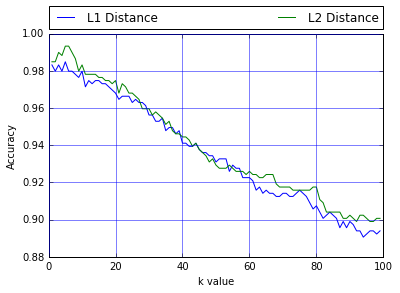

In [62]:
#print models
v = np.arange(1, models.shape[0]+1)


#plt.ylim([0.92,1])
plt.plot(v[:],models[:,0], label = 'L1 Distance')
plt.plot(v[:],models[:,1], label = 'L2 Distance')
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.grid(b=True, which='major', color='b', linestyle='-')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=10, ncol=3, mode="expand", borderaxespad=0.)